# Определение рыночной стоимости недвижимости

**Цель исследования** — 

Определять рыночную стоимость объектов недвижимости из имеющихся данных.

Задача — установить параметры, которые вляют на стоимость недвижимости.

**Ход исследования**

Данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

Данные  получены из файла `real_estate_data.csv`. 
О качестве данных ничего не известно. 
Поэтому перед выполнением задачи необходим обзор данных, 
проверка данных на ошибки и оценка их влияния на исследование, 
исправление критичных ошибок данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Решение задачи

### Шаг 1. Обзор данных

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#df = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #Код ревьюера

df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В таблице 23699 строк и 22 столбца. Тип данных во всех столбцах — `object`, `int64`, `float64`, `bool`

Согласно документации к данным:

Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

### Шаг 2.1 Заполнение пропусков

Определим и изучим пропущенные значения. 


In [6]:
print(df.isna().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Значение столбцов

1. ceiling_height            9195 высота потолков (м)
2. floors_total                86 всего этажей в доме
3. living_area               1903 жилая площадь в квадратных метрах (м²)
4. is_apartment             20924 это нежилые помещения
5. kitchen_area              2278 площадь кухни в квадратных метрах (м²)
6. balcony                  11519 число балконов
7. locality_name               49 название населённого пункта
8. airports_nearest          5542 расстояние до ближайшего аэропорта в метрах (м)
9. cityCenters_nearest       5519 расстояние до центра города (м)
10. parks_around3000         5518 число парков в радиусе 3 км
11. parks_nearest           15620 расстояние до ближайшего парка (м)
12. ponds_around3000         5518 число водоёмов в радиусе 3 км
13. ponds_nearest           14589 расстояние до ближайшего водоёма (м)
14. days_exposition          3181 сколько дней было размещено объявление (от публикации до снятия)

Для некоторых пропущенных значений можно предположить логичную замену:

1. `ceiling_height` Высота потолков (м) заполнить медианным значением, так как возможны двухуровневые квартиры или с высотой потолка более 3х метров, чтобы исключить выбросы. Причина пропусков: скорее всего данные не заполнены пользователем. 

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

2. `floors_total` В различных домах, такой параметр как "последний этаж" может влиять по разному, в одних домаъ это минус, в других наоборот плюс (пентхаус), но в нашем случае на общую картину не повлияет, так как пропусков мало.  Причина пропусков: скорее всего данные не заполнены пользователем. Поетому удалим пропущенные значения

In [8]:
df = df.dropna(subset = ['floors_total'])

3. `balcony` число балконов, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на `0`

In [9]:
df['balcony'] = df['balcony'].fillna(0)

4. `locality_name`- название населённого пункта. Отсутствуют данные в 49 строках, отбросим эти данные, так  как их мало, а расположение очень влияет на стоимость. 

In [10]:
df = df.dropna(subset = ['locality_name'])

5. `is_apartment` всего 20924 пропусков из  23699. Причина пропусков: не заполнено в случае если не относится к апартаметам. Заполним 0. После заменим тип  object на bool.  

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')

6. `days_expositio` - сколько дней было размещено объявление (от публикации до снятия).

пропуск в этой колонке означает, что объект не продан и объявление не закрыто.

In [12]:
df = df.dropna(subset = ['days_exposition'])

7. Заполним `0` отсутствие водоемов и парков. Причина: отсутствие водоемов и парков

In [13]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

8. `living_area`.  Причина пропусков: скорее всего данные не заполнены пользователем из-за отсутствия данных о жилой площади.
`kitchen_area` , площадь кухни в квадратных метрах (м²).   Причина пропусков:не заполненно пользователем.

Заполним пропуски  через отношение жилой площади и площади кухни к общей.

In [14]:
#df = df.dropna(subset = ['kitchen_area' ,'living_area'])

In [15]:
df['kitchen_area'] = (
    df['kitchen_area'].fillna(df['total_area']*
    df['kitchen_area'].median()/df['total_area'].median())
) 

In [16]:
df['living_area'] = df['living_area'].fillna(df['total_area']*df['living_area'].median()/df['total_area'].median())

### Шаг 2.2. Изменение типов данных.

Заменим тип данных в следующих столбцах: 
 1.   `floors_total` float64 заменим на int64, колличнство этажей - целое число
 3.   `balcony`      float64 заменим на int64, колличнство балконов - целое число
 4.   `parks_around3000`        float64 заменим на int64,  колличнство парков - целое число
 7.   `parks_nearest`         float64 заменим на int64, колличнство парков - целое число
 8.   `ponds_around3000`       float64 заменим на int64, колличнство водоемов - целое число
 9.   `ponds_nearest`            float64 заменим на int64, колличнство водоемов - целое число
 10.  `days_exposition`         float64 заменим на int64, колличнство дней - целое число



In [17]:
df['floors_total'] = df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64', errors='ignore')
df['parks_nearest'] = df['parks_nearest'].astype('int64', errors='ignore')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64', errors='ignore')
df['ponds_nearest'] = df['ponds_nearest'].astype('int64', errors='ignore')
df['days_exposition'] = df['days_exposition'].astype('int64')

Переведем из строки во время столбец `first_day_exposition` 

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


В столбцах 
`airports_nearest`  расстояние до ближайшего аэропорта в метрах (м)   пропущено 5542 значения, отсутствуют данные/рядом с объектами  нет аэропортов поблизости
`cityCenters_nearest` расстояние до центра города (м) пропущено 5519 значения, отсутствуют данные/объекты не в городе
Пропуски заменять не будеем

Проверим данные 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20394 non-null  int64         
 1   last_price            20394 non-null  float64       
 2   total_area            20394 non-null  float64       
 3   first_day_exposition  20394 non-null  datetime64[ns]
 4   rooms                 20394 non-null  int64         
 5   ceiling_height        20394 non-null  float64       
 6   floors_total          20394 non-null  int64         
 7   living_area           20394 non-null  float64       
 8   floor                 20394 non-null  int64         
 9   is_apartment          20394 non-null  bool          
 10  studio                20394 non-null  bool          
 11  open_plan             20394 non-null  bool          
 12  kitchen_area          20394 non-null  float64       
 13  balcony         

Первоначальная таблица содержала 23699, в обработанной  20394, удалено 14% данных.

Все данные приведены к необходимым типам

### Шаг 2.3. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Шаг 3. Посчитаем и добавим в таблицу
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [20]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

df['floor_category'] = df.apply(floor_category, axis=1)

df['price_square_meter'] = df['last_price']/df['total_area']
df['ratio_living_area'] = df['living_area']/df['total_area']
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']

In [21]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['day_name_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

Разабьем высоту потолков на группы

def ceiling_height_category(row):
    height = row['ceiling_height']
    if height < 3:
        return 2
    if height < 4:
        return 3
    if height < 5:
        return 4
    return 5

df['ceiling_height_category'] = df.apply(ceiling_height_category, axis=1)


In [22]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,floor_category,price_square_meter,ratio_living_area,ratio_kitchen_area,year_exposition,month_exposition,day_name_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,81,первый,82920.792079,0.460396,0.272277,2018,12,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574,558,другой,92785.714286,0.612500,0.148214,2015,8,3
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,93.897638,9,False,...,3,234,424,другой,408176.100629,0.590551,0.179134,2015,7,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121,другой,100000.000000,0.320000,0.410000,2018,6,1
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,0,0,55,другой,95065.789474,0.473684,0.299342,2018,9,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0,0,155,другой,99195.710456,0.284182,0.386059,2017,11,3
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,0,0,189,другой,87454.764777,0.465320,0.265682,2018,5,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0,0,289,другой,88524.590164,0.714754,0.106557,2017,2,6
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,2,553,137,другой,127525.252525,0.512626,0.214646,2017,11,3
11,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.000000,4,False,...,0,0,7,другой,75000.000000,0.704545,0.136364,2018,8,0


In [23]:
def total_area_category(row):
    total_area = row['total_area']
    if total_area < 10:
        return 10
    if total_area < 20:
        return 20
    if total_area < 30:
        return 30
    if total_area < 40:
        return 40
    if total_area < 50:
        return 50
    if total_area < 60:
        return 60
    if total_area < 70:
        return 70
    if total_area < 80:
        return 80
    if total_area < 90:
        return 90
    if total_area < 100:
        return 100
    if total_area < 110:
        return 110
    if total_area < 120:
        return 120
    if total_area < 130:
        return 130
    if total_area < 140:
        return 140
    return 150

df['total_area_category'] = df.apply(total_area_category, axis=1)

### Шаг 3.1. Проведем исследовательский анализ данных 
Изучим  параметры: площадь, цена, число комнат, высота потолков. Постром гистограммы для каждого параметра. 
Уберем редкие и выбивающиеся значения.

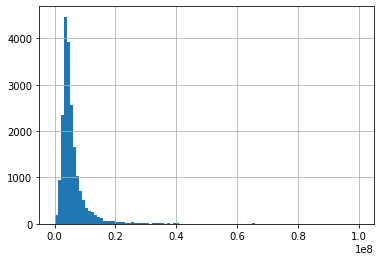

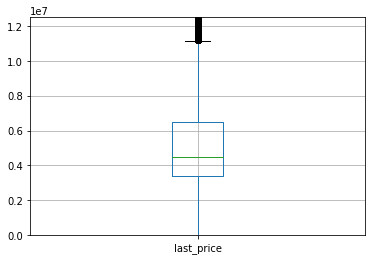

In [24]:
df['last_price'].hist(bins=100, range=(0, 100000000))
plt.show()
plt.ylim(-100, 12500000)
df.boxplot('last_price')
plt.show()


Уберем значения больше 11000000

count    2.039400e+04
mean     6.263722e+06
std      1.088858e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    1.871300e+04
mean     4.711241e+06
std      2.070736e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      1.100000e+07
Name: last_price, dtype: float64

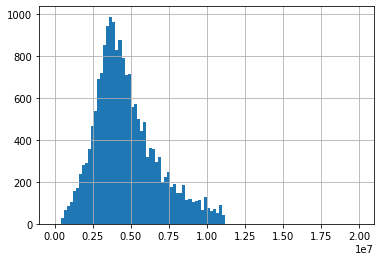

In [25]:
good_df = df.query('last_price <= 11000000')
display(df['last_price'].describe())
display(good_df['last_price'].describe())
good_df['last_price'].hist(bins=100, range=(0, 20000000) )
plt.show()

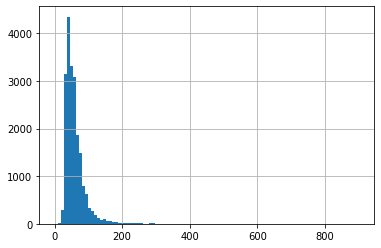

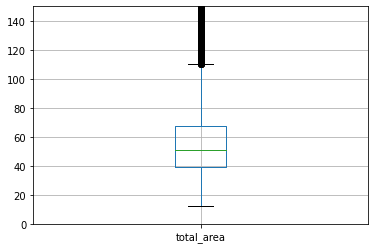

In [26]:
df['total_area'].hist(bins=100,range=(0, 900))
plt.show()
plt.ylim(0, 150)
df.boxplot('total_area')
plt.show()

Уберем значения больше 110 и меньше 14

count    20394.000000
mean        58.834265
std         34.066200
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

count    18533.000000
mean        51.700435
std         17.062953
min         14.000000
25%         38.300000
50%         48.000000
75%         62.000000
max        110.000000
Name: total_area, dtype: float64

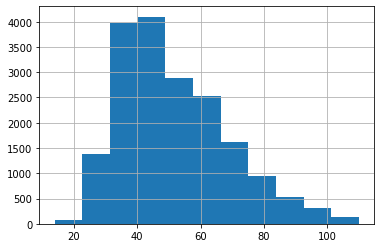

In [27]:
good_df = good_df.query('14 <= total_area <= 110')
display(df['total_area'].describe())
display(good_df['total_area'].describe())
good_df['total_area'].hist(bins=11,range=(14, 110))
plt.show()

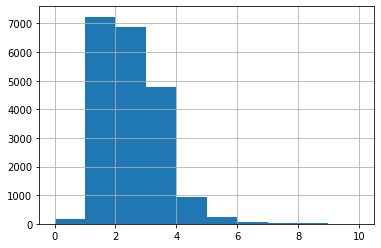

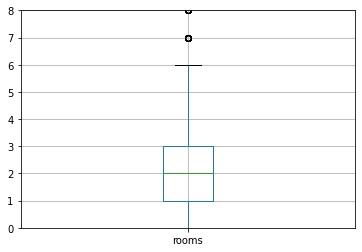

In [28]:
df['rooms'].hist(bins=10, range=(0, 10))
plt.show()
plt.ylim(0, 8)
df.boxplot('rooms')
plt.show()

Уберем значения меньше 1 и больше 6

count    20394.000000
mean         2.024370
std          1.055162
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    18355.000000
mean         1.892019
std          0.858331
min          1.000000
25%          1.000000
50%          2.000000
75%          2.500000
max          6.000000
Name: rooms, dtype: float64

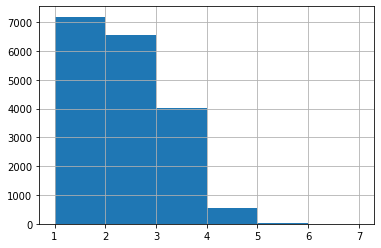

In [29]:
good_df = good_df.query('1 <= rooms <= 6')
display(df['rooms'].describe())
display(good_df['rooms'].describe())
good_df['rooms'].hist(bins=6, range=(1, 7))
plt.show()


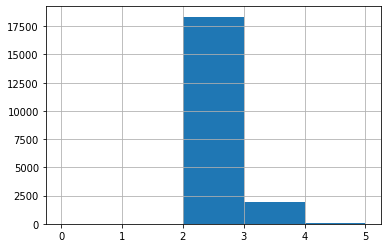

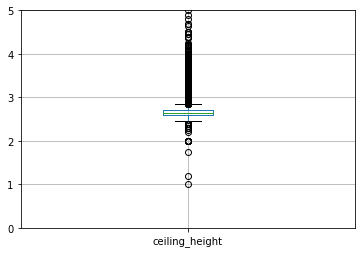

In [30]:
df['ceiling_height'].hist(bins=5, range=(0, 5))
plt.show()
plt.ylim(0, 5)
df.boxplot('ceiling_height')
plt.show()

Уберем значения с высотой потолков больше 3, а  также уберем потолки меньше 2.5, с учетом того что высота потолков от 2.5  

count    20394.000000
mean         2.715801
std          0.972956
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

count    17015.000000
mean         2.631566
std          0.083379
min          2.500000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.990000
Name: ceiling_height, dtype: float64

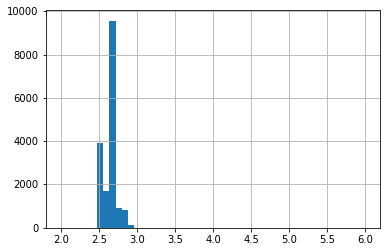

In [31]:
good_df = good_df.query('2.5 <= ceiling_height < 3')
display(df['ceiling_height'].describe())
display(good_df['ceiling_height'].describe())
good_df['ceiling_height'].hist(bins=50, range=(2, 6))
plt.show()

Высота потолков находится в промежутке от 2.5 до 3 м

Изучим время продажи квартиры. Постром гистограмму. Посчитаем среднее и медиану. 
Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 

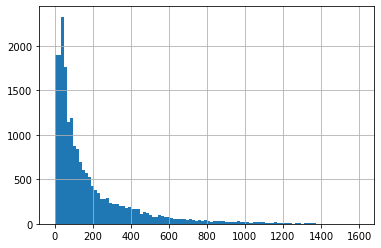

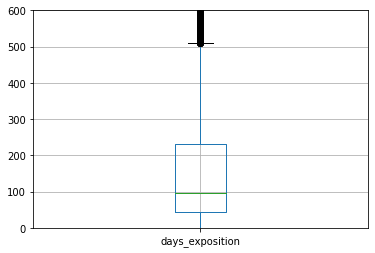

In [32]:
df['days_exposition'].hist(bins=100, range=(0, 1600))
plt.show()
plt.ylim(0, 600)
df.boxplot('days_exposition')
plt.show()

Отсеем значения больше 520 дней. 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    15845.000000
mean       124.221458
std        119.849555
min          1.000000
25%         39.000000
50%         79.000000
75%        175.000000
max        520.000000
Name: days_exposition, dtype: float64

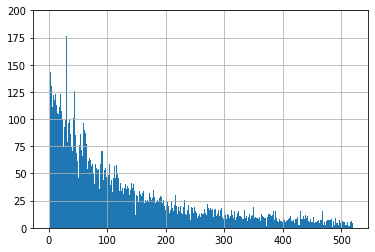

In [33]:
good_df = good_df.query('days_exposition <= 520')
display(df['days_exposition'].describe())
display(good_df['days_exposition'].describe())
plt.ylim(0, 200)
good_df['days_exposition'].hist(bins=521, range=(0, 520))
plt.show()


In [34]:
good_df = good_df.reset_index(drop=True)


<AxesSubplot:>

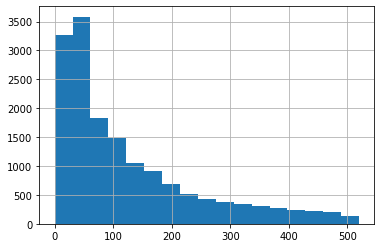

In [35]:
good_df['days_exposition'].hist(bins=17, range=(0, 520))

<AxesSubplot:>

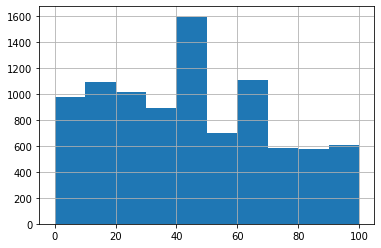

In [36]:
good_df['days_exposition'].hist(bins=10, range=(0, 100))

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Как ты считаешь? Когда продажа прошла быстро, когда необычно медленно?

Стоит проверить также диапазон до 100 дней, что там за пики?</div>

<div class="alert-info">
<b>Комментарий студента</b>
</div>
Продажа прошла быстро  - до 70 дней

Продажа прошла медленно  - больше 250 дней

Скачки продаж от 40 до 50 дней ии от 60 до 70 дней. 


<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Скорее всего на этих пиках отразилось автоматическое снятие объявлений с продажи.</div>

### 3.1 Какие факторы больше всего влияют на стоимость квартиры

Проверим зависимости между стоимостью и другими параметрами

total_area 0.6743328493243248
ceiling_height 0.24264641409254206
living_area 0.5358835738509521
kitchen_area 0.4809878606497099
days_exposition 0.020949406325338236
ratio_kitchen_area -0.09328209351947536
price_square_meter 0.6260304937254719
ratio_living_area -0.0006762313497923145


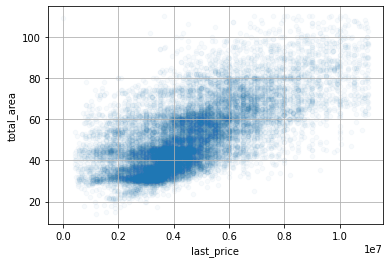

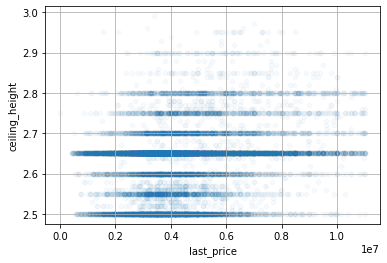

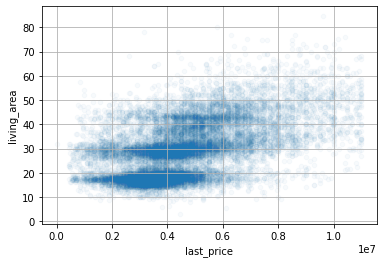

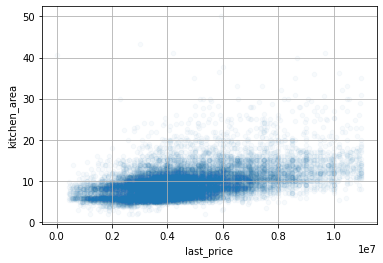

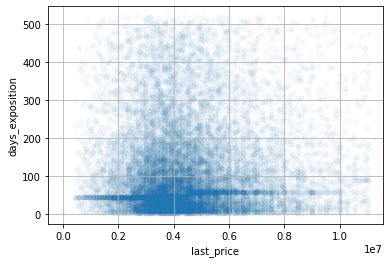

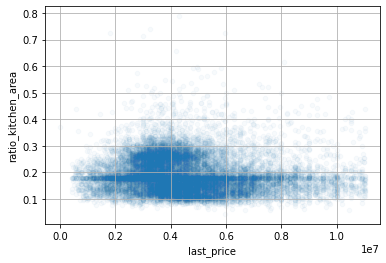

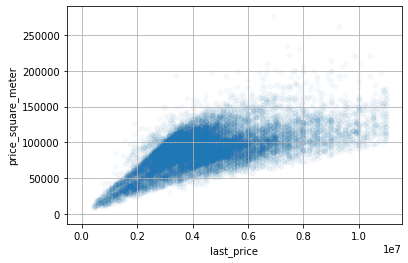

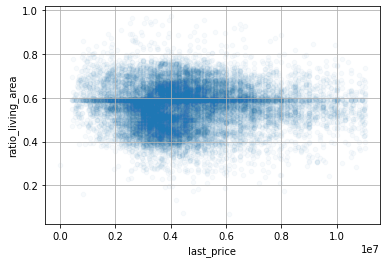

In [37]:
def print_corr(df, column):
    df.plot(x='last_price', y=column, kind='scatter', grid=True, alpha=0.03)
    print(column, df['last_price'].corr(df[column]))

columns =   ['total_area',  'ceiling_height',  'living_area',
               'kitchen_area', 'days_exposition', 'ratio_kitchen_area', 'price_square_meter',
'ratio_living_area'] 

for column in columns:
    print_corr(good_df, column)


<div class="alert-info">
<b>С изменениями</b>
</div>

Цена звисти от `total_area` корреляция 0.6943998858412781, соответственно и от `price_square_meter` коррляция 0.6260304937254719

Зависимость от `living_area`  и 
`kitchen_area`  слабая  

От остальных параметров почти не зависит

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

,mean,median
,last_price,last_price
floor_category,,
другой,4.726133e+06,4380000.0
первый,3.810269e+06,3600000.0
последний,4.093782e+06,3800000.0


<AxesSubplot:xlabel='floor_category'>

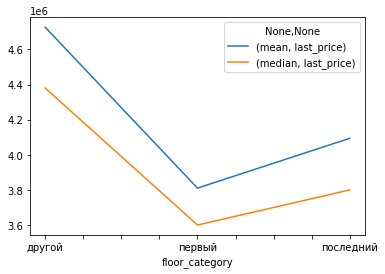

In [38]:
display(good_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']).plot()

Стоимость зависит от этажа, на первом и последнем этажах стоимость ниже чем на всех остальных. 

,mean,median
,price_square_meter,price_square_meter
rooms,,
1,98303.252974,98990.950226
2,87778.099727,89166.666667
3,80795.495535,82775.414241
4,76712.749888,78000.000000
5,66516.155087,72649.572650
6,72252.631579,72252.631579


<AxesSubplot:xlabel='rooms'>

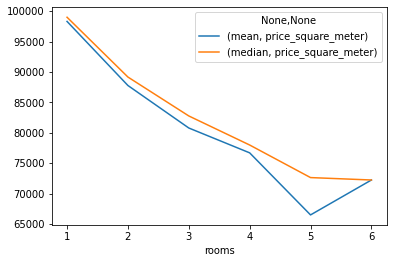

In [39]:
display(good_df.pivot_table(index='rooms', values='price_square_meter', aggfunc=['mean','median']))
good_df.pivot_table(index='rooms', values='price_square_meter', aggfunc=['mean','median']).plot()

Чем больше комнат, тем дешевле квадратный метр. 

Также изучим зависимость от даты размещения: дня недели, месяца и года.

,mean,median
,last_price,last_price
day_name_exposition,,
0,4.530898e+06,4200000.0
1,4.547706e+06,4200000.0
2,4.517994e+06,4200000.0
3,4.536921e+06,4200000.0
4,4.559613e+06,4200000.0
5,4.504839e+06,4200000.0
6,4.486129e+06,4150000.0


<AxesSubplot:xlabel='day_name_exposition'>

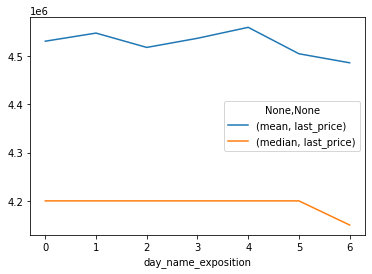

In [40]:
display(good_df.pivot_table(index='day_name_exposition', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='day_name_exposition', values='last_price', aggfunc=['mean','median']).plot()

,mean,median
,last_price,last_price
month_exposition,,
1,4.508275e+06,4220000.0
2,4.541995e+06,4200000.0
3,4.467174e+06,4150000.0
4,4.563097e+06,4245000.0
5,4.509088e+06,4200000.0
6,4.393290e+06,4050000.0
7,4.495289e+06,4140000.0
8,4.589077e+06,4200000.0


<AxesSubplot:xlabel='month_exposition'>

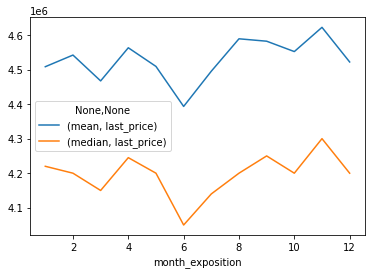

In [41]:
display(good_df.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean','median']).plot()

В летние месяцы цена снижается

,mean,median
,last_price,last_price
year_exposition,,
2015,4.740366e+06,4390000.0
2016,4.503388e+06,4136008.0
2017,4.518899e+06,4150000.0
2018,4.500027e+06,4200000.0
2019,4.813356e+06,4500000.0


<AxesSubplot:xlabel='year_exposition'>

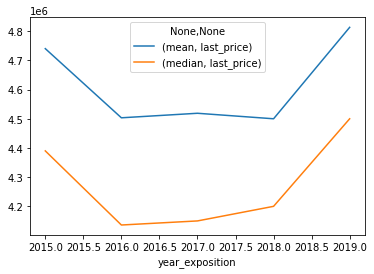

In [42]:
display(good_df.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean','median']).plot()

Цена снижается  к 2016 году, далее растет 

Изучим зависимость от колличества балконов

,mean,median
,last_price,last_price
balcony,,
0,4.441095e+06,4100000.0
1,4.378683e+06,4100000.0
2,4.876866e+06,4500000.0
3,5.721651e+06,5500000.0
4,5.704888e+06,5600000.0
5,6.283822e+06,5825000.0


<AxesSubplot:xlabel='balcony'>

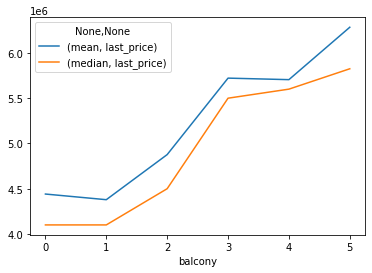

In [43]:
display(good_df.pivot_table(index='balcony', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='balcony', values='last_price', aggfunc=['mean','median']).plot()

Чем больше балконов, тем выше стоимость. 

Изучим зависимотсь от высоты потолков

,mean,median
,last_price,last_price
ceiling_height,,
2.50,3.895565e+06,3799000.0
2.51,4.369633e+06,4075000.0
2.52,3.913239e+06,3750000.0
2.53,4.245938e+06,4050000.0
2.54,4.198833e+06,3845000.0
2.55,4.052332e+06,3890000.0
2.56,4.148888e+06,3900000.0
2.57,4.566855e+06,4500000.0


<AxesSubplot:xlabel='ceiling_height'>

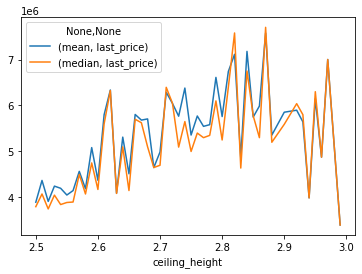

In [44]:
display(good_df.pivot_table(index='ceiling_height', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='ceiling_height', values='last_price',  aggfunc=['mean','median']).plot()

 Наиболее дорогая категория  высотой потолков от 2.8 до 2.9 метров. 

,mean,median
,last_price,last_price
rooms,,
1,3.657916e+06,3505500.0
2,4.778728e+06,4500000.0
3,5.646577e+06,5400000.0
4,5.908087e+06,5850000.0
5,5.846818e+06,5275000.0
6,6.864000e+06,6864000.0


<AxesSubplot:xlabel='rooms'>

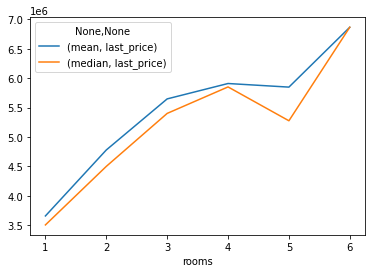

In [45]:
display(good_df.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median']))
good_df.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median']).plot()

Чем больше комнат, тем выше цена

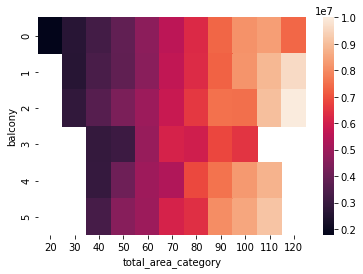

In [46]:
uniform_data2 = good_df.pivot_table(index='balcony', columns='total_area_category',  values='last_price')

ax1 = sns.heatmap(uniform_data2)

Чем больше площадь и балконов, тем выше цена. 

#### 3.1.1 Топ городов

Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [47]:
good_df['cityCenters_nearest_km'] = (good_df['cityCenters_nearest']/1000).round().astype('int64', errors='ignore')
top_ten_locality_name = good_df['locality_name'].value_counts().head(10)
display(top_ten_locality_name)
top_ten_df = good_df.query('locality_name in @top_ten_locality_name.index')
top_ten_mean_price = top_ten_df.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean'])
top_ten_mean_price.columns = [ 'mean_price_square_meter']
top_ten_mean_price = top_ten_mean_price.sort_values('mean_price_square_meter', ascending=False)
display(top_ten_mean_price)


Санкт-Петербург      9913
посёлок Мурино        455
посёлок Шушары        379
Всеволожск            293
посёлок Парголово     282
Колпино               276
деревня Кудрово       252
Пушкин                235
Гатчина               229
Выборг                174
Name: locality_name, dtype: int64

,mean_price_square_meter
locality_name,
Санкт-Петербург,103253.382334
Пушкин,98654.240443
деревня Кудрово,92446.889894
посёлок Парголово,89486.613473
посёлок Мурино,85352.730817
посёлок Шушары,77419.261685
Колпино,74629.034170
Гатчина,67924.220568
Всеволожск,66430.712642


Выводы:
город с самой высокой стоимостью Санкт-Петербург
город с самой низкой стоимостью Всеволожск

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). 

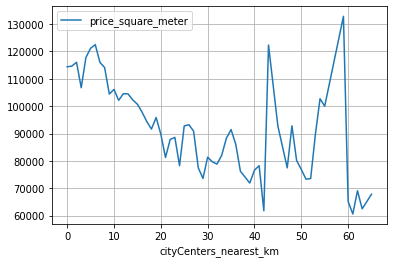

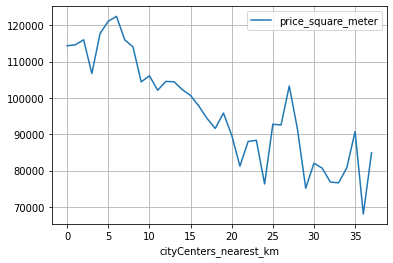

In [48]:

good_df_city_km = good_df.pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc='mean').reset_index()
good_df_city_km.plot(x='cityCenters_nearest_km', y='price_square_meter', grid=True)

top_ten_df_center = top_ten_df.pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc='mean').reset_index()
top_ten_df_center.plot(x='cityCenters_nearest_km', y='price_square_meter', grid=True)
plt.show()


Цена резко меняется на 9 км

#### 3.1.2 квартиры в Санкт-Петербурге
Изучим предложение квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделим квартиры в Санкт-Петербурге.

,price_square_meter
cityCenters_nearest_km,
0.0,114373.749500
1.0,114649.554831
2.0,116020.760060
3.0,106732.255588
4.0,117752.161378
5.0,121143.270943
6.0,122474.606434
7.0,115987.720316
8.0,114095.175833


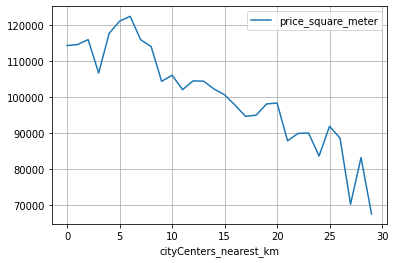

In [49]:
st_petersburg_df = good_df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
st_petersburg_df['cityCenters_nearest_km'] = (
    (st_petersburg_df['cityCenters_nearest']/1000)
    .round().astype('int64', errors='ignore')
)
st_petersburg_df_city =(
    st_petersburg_df.pivot_table(index='cityCenters_nearest_km', 
    values='price_square_meter', aggfunc='mean')
)    
display(st_petersburg_df_city)
st_petersburg_df_city = st_petersburg_df_city.reset_index()
st_petersburg_df_city.plot(x='cityCenters_nearest_km', y='price_square_meter', grid=True)
plt.show()   

График меняется на 9 км, до 9 км является центром

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

total_area 0.7065888683072997
ceiling_height 0.18912256212502906
living_area 0.5455993792562741
kitchen_area 0.5044396610983073
days_exposition 0.10361438993248831
ratio_kitchen_area -0.060262265195753444
price_square_meter 0.3344555168165124
ratio_living_area -0.049581659655737645


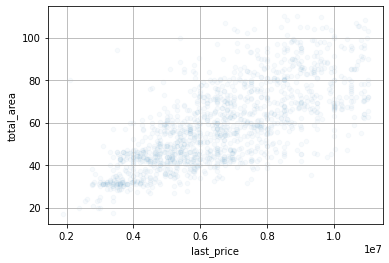

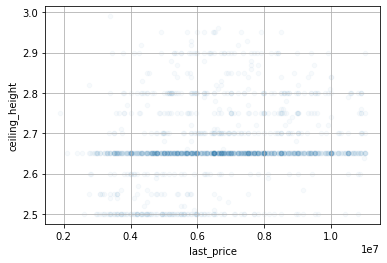

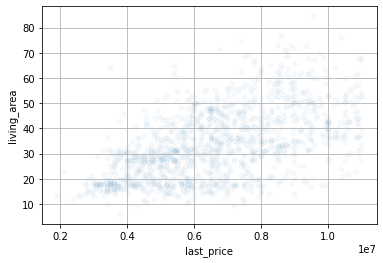

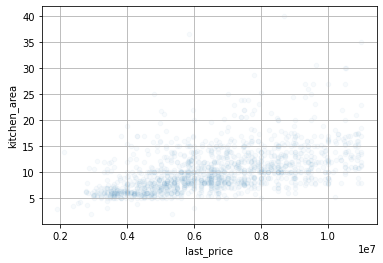

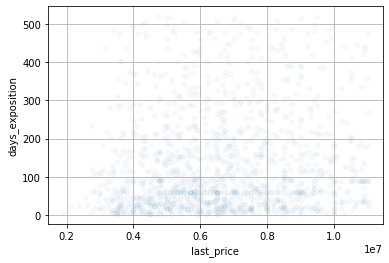

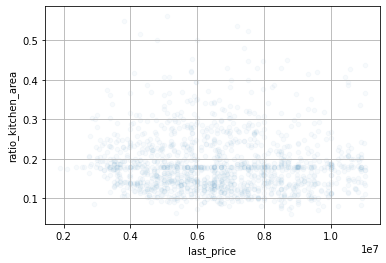

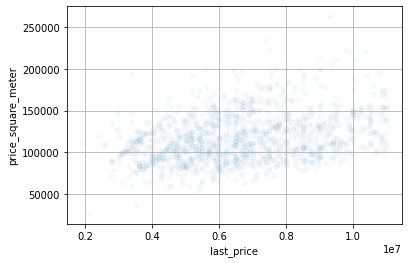

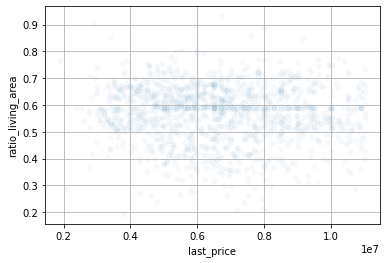

In [50]:
st_petersburg_centr_df = st_petersburg_df.query('cityCenters_nearest_km < 9') 
for column in columns:
    print_corr(st_petersburg_centr_df, column)


Цена зависит от площади и жилой площади
total_area 0.8093342409451812
living_area 0.6355886287575642

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Логично.</div>

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления и  тд).

,mean,median
,last_price,last_price
floor_category,,
другой,6.846087e+06,6750000.0
первый,5.542240e+06,5300000.0
последний,6.588760e+06,6400000.0


<AxesSubplot:xlabel='floor_category'>

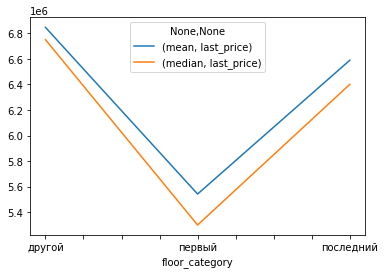

In [51]:
display(st_petersburg_centr_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']).plot()

На первом и последнем этажах цена ниже

,mean,median
,price_square_meter,price_square_meter
rooms,,
1,137501.308528,135714.285714
2,115902.051246,113600.516203
3,100959.808003,99941.176471
4,93442.592331,93650.793651
5,76316.444887,76316.444887


<AxesSubplot:xlabel='rooms'>

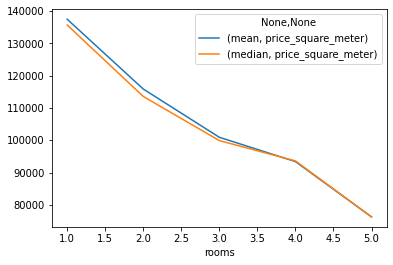

In [52]:
display(st_petersburg_centr_df.pivot_table(index='rooms', values='price_square_meter', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='rooms', values='price_square_meter', aggfunc=['mean','median']).plot()

,mean,median
,last_price,last_price
day_name_exposition,,
0,6.643638e+06,6406591.0
1,6.586753e+06,6500000.0
2,6.517080e+06,6300000.0
3,6.551607e+06,6394800.0
4,6.633436e+06,6594500.0
5,6.798291e+06,6731199.5
6,7.039655e+06,7085000.0


<AxesSubplot:xlabel='day_name_exposition'>

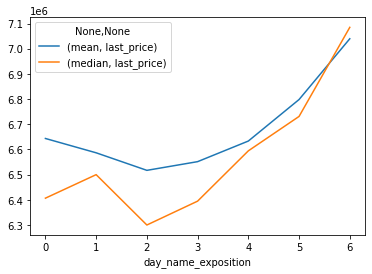

In [53]:
display(st_petersburg_centr_df.pivot_table(index='day_name_exposition', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='day_name_exposition', values='last_price', aggfunc=['mean','median']).plot()

А в выходные цена выше

,mean,median
,last_price,last_price
month_exposition,,
1,6.648374e+06,6500000.0
2,6.532470e+06,6249500.0
3,6.743555e+06,6550000.0
4,6.481511e+06,6140000.0
5,6.536420e+06,6498000.0
6,6.400409e+06,6500000.0
7,6.773813e+06,6700000.0
8,6.618311e+06,6600000.0


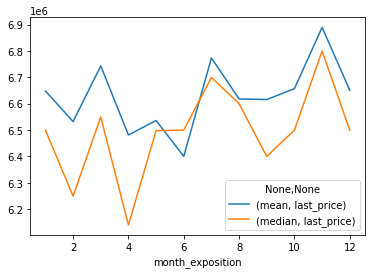

In [54]:
st_petersburg_centr_df.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean','median']).plot()
display(st_petersburg_centr_df.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean','median']))

В зимние и весенние месяцы цена ниже 

,mean,median
,last_price,last_price
year_exposition,,
2015,6.547489e+06,6500000.0
2016,6.654312e+06,6625000.0
2017,6.662479e+06,6500000.0
2018,6.626476e+06,6450000.0
2019,6.451068e+06,6500000.0


<AxesSubplot:xlabel='year_exposition'>

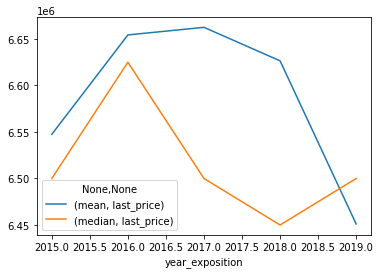

In [55]:
display(st_petersburg_centr_df.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean','median']).plot()

Цена растет к 2016 году и снижается после 2017 

,mean,median
,last_price,last_price
ceiling_height,,
2.50,5.325432e+06,5050000.0
2.51,6.199500e+06,6199500.0
2.52,5.163333e+06,5500000.0
2.53,5.700000e+06,5700000.0
2.54,4.435000e+06,3850000.0
2.55,4.544583e+06,4675000.0
2.56,5.790000e+06,4500000.0
2.57,4.229988e+06,4229988.0


<AxesSubplot:xlabel='ceiling_height'>

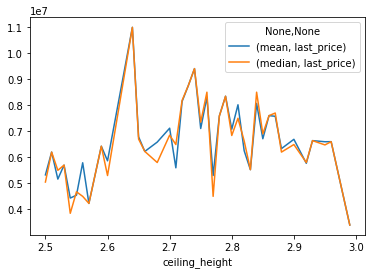

In [56]:
display(st_petersburg_centr_df.pivot_table(index='ceiling_height', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='ceiling_height', values='last_price', aggfunc=['mean','median']).plot()

Наиболее ценятся квартиры с потолками от 2.6 до 2.9 

,mean,median
,last_price,last_price
floor_category,,
другой,6.846087e+06,6750000.0
первый,5.542240e+06,5300000.0
последний,6.588760e+06,6400000.0


<AxesSubplot:xlabel='floor_category'>

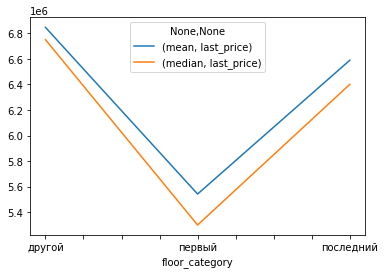

In [57]:
display(st_petersburg_centr_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median']).plot()

,mean,median
,last_price,last_price
balcony,,
0,6.582354e+06,6500000.0
1,6.224722e+06,6140000.0
2,7.369218e+06,6999500.0
3,9.950000e+06,9950000.0
4,7.475000e+06,7600000.0
5,8.321984e+06,8888888.0


<AxesSubplot:xlabel='balcony'>

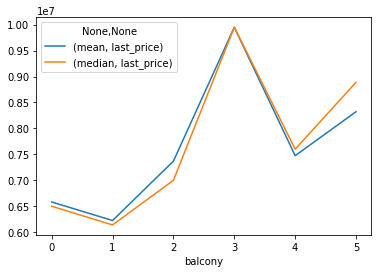

In [58]:
display(st_petersburg_centr_df.pivot_table(index='balcony', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='balcony', values='last_price', aggfunc=['mean','median']).plot()

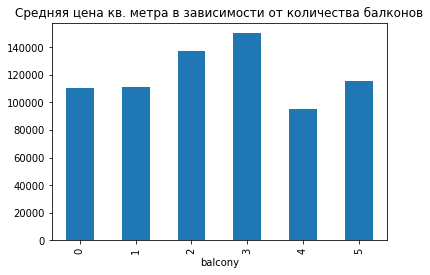

In [68]:
#Код ревьюера
st_petersburg_centr_df.groupby('balcony')['price_square_meter'].median().plot(kind = 'bar')
plt.title('Средняя цена кв. метра в зависимости от количества балконов')
plt.show()

Рассмотрим корреляцию площади и других параметров

,mean,median
,last_price,last_price
cityCenters_nearest_km,,
0.0,6.466667e+06,6900000.0
1.0,7.747686e+06,7800000.0
2.0,7.446045e+06,7730000.0
3.0,6.560564e+06,6100000.0
4.0,6.812122e+06,6731199.5
5.0,7.107456e+06,7000000.0
6.0,6.628761e+06,6397400.0
7.0,6.247220e+06,5950000.0


<AxesSubplot:xlabel='cityCenters_nearest_km'>

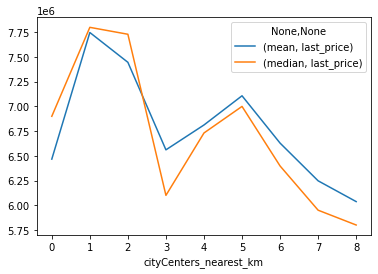

In [59]:
display(st_petersburg_centr_df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean','median']))
st_petersburg_centr_df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean','median']).plot()

Чем дальше от центра, тем ниже цена

In [60]:
print(good_df['total_area'].corr(good_df['rooms']))
print(good_df['total_area'].corr(good_df['balcony']))
print(good_df['total_area'].corr(good_df['living_area']))
print(good_df['total_area'].corr(good_df['kitchen_area']))


0.7992575924230456
0.10131608812192731
0.9058957935866966
0.4546840519191166


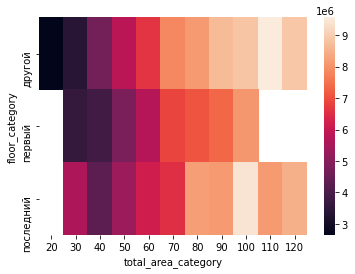

In [61]:
uniform_data1 = st_petersburg_centr_df.pivot_table(index='floor_category', columns='total_area_category',  values='last_price')

ax1 = sns.heatmap(uniform_data1)

На этажах,  отличных от певого и последнего, в зависимости от площади, возрастает цена. На первом этаже недвижимость дешевле

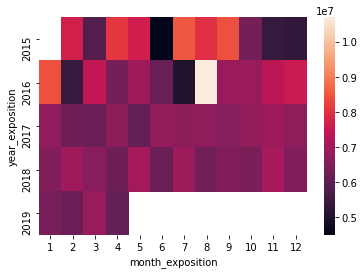

In [62]:
uniform_data1 = st_petersburg_centr_df.pivot_table(index='year_exposition', columns='month_exposition',  values='last_price')

ax1 = sns.heatmap(uniform_data1)

Рост цен с 2015 по начало 2016

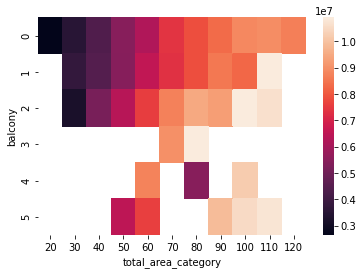

In [63]:
uniform_data2 = st_petersburg_centr_df.pivot_table(index='balcony', columns='total_area_category',  values='last_price')

ax1 = sns.heatmap(uniform_data2)

Чем больше площадь и балконов тем выше цена

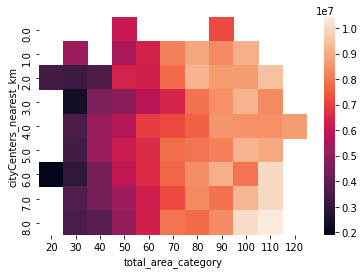

In [64]:
uniform_data2 = st_petersburg_centr_df.pivot_table(index='cityCenters_nearest_km', columns='total_area_category',  values='last_price')

ax1 = sns.heatmap(uniform_data2)


## Общий вывод

Цена недвижимости завиит от общей площади, этажа, колличества балконов, высоты потолков, расстояния от центра города. 
Выводы по центру Санкт-Петербурга и другой недвижимостью совпадают. 

Стоимость недвижимости  в  центре Санкт-Петербурга в 2016 возрасла, в отличии от стоимости недвижимости в других регионах,где она  снизилась
